In [1]:
# imports essential libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Dataset.xlsx')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
# renames columns

df.columns = ['restaurant_id','restaurant_name','country_code','city','address','locality','locality_verbose','longitude','latitude','cuisines',
              'avg_cost_for_two','currency','table_booking','online_delivery','delivering_now','switch_to_order_menu','price_range','aggregate_rating',
              'rating_color','rating_text','votes']

### Task 1: `Top Cuisines`

In [4]:
# 1. top 3 most common cuisines in the dataset

cuisine_counts = df['cuisines'].str.split(',').explode().str.strip().value_counts()
cuisine_counts.head(3)

cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

In [5]:
# the percentage of restaurants that serve each of the top cuisines

cuisine_pct = (cuisine_counts / len(df)) * 100
top_cuisines_counts = cuisine_counts.head(3)
cuisine_pct.head(3)

cuisines
North Indian    41.500734
Chinese         28.662754
Fast Food       20.813247
Name: count, dtype: float64

### Task 2: `City Analysis`

In [6]:
# 2. City with the highest number of restaurants, average rating per city and city with highest average rating

city_counts = df.groupby('city')['restaurant_name'].nunique()
city_most_restaurants = city_counts.idxmax()
avg_rating_per_restaurant = df.groupby(['city', 'restaurant_name'])['aggregate_rating'].mean().reset_index()
avg_rating_by_city = avg_rating_per_restaurant.groupby('city')['aggregate_rating'].mean()
city_highest_avg_rating = avg_rating_by_city.idxmax()

In [7]:
print('City Analysis Summary')
print("-" * 35)
print(f"City with Most Restaurants: {city_most_restaurants} ({city_counts[city_most_restaurants]} restaurants)")
print(f"City with Highest Average Rating: {city_highest_avg_rating} ({avg_rating_by_city[city_highest_avg_rating]:.2f} average rating)")
print("\nTop 5 Cities by Number of Restaurants:")
print(city_counts.sort_values(ascending=False).head(5))

City Analysis Summary
-----------------------------------
City with Most Restaurants: New Delhi (4295 restaurants)
City with Highest Average Rating: Inner City (4.90 average rating)

Top 5 Cities by Number of Restaurants:
city
New Delhi    4295
Gurgaon       943
Noida         902
Faridabad     235
Ghaziabad      25
Name: restaurant_name, dtype: int64


### Task 3: `Price Range Distribution`

In [8]:
# 3. Distribution of price ranges + percentage per category
price_counts = df['price_range'].value_counts()
price_pct = (price_counts / len(df)) * 100
price_pct.round(2)

price_range
1    46.51
2    32.62
3    14.72
4     6.14
Name: count, dtype: float64

In [9]:
price_summary = pd.DataFrame({'count': price_counts,'percentage': price_pct.round(2)})
price_summary.index.name = 'Price range'
print(price_summary)

             count  percentage
Price range                   
1             4438       46.51
2             3113       32.62
3             1405       14.72
4              586        6.14


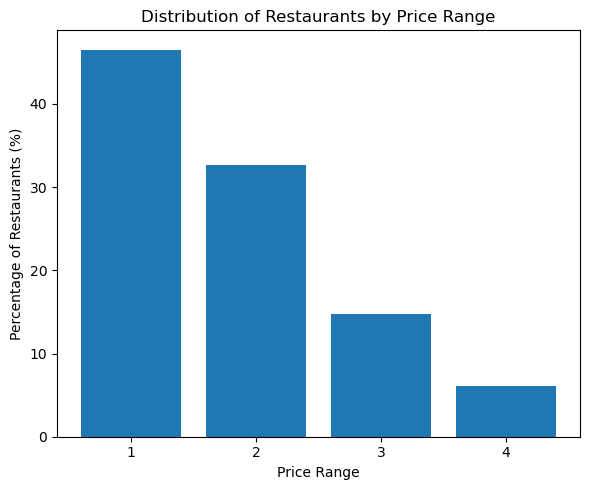

In [10]:
plt.figure(figsize=(6,5))
plt.bar(price_counts.index.astype(str), price_pct)
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants (%)')
plt.title('Distribution of Restaurants by Price Range')
plt.tight_layout()
plt.show()

###  Task 4: `Online Delivery`

In [11]:
online_counts = df['online_delivery'].rename('Online Delivery').value_counts()
online_pct = (online_counts / len(df)) * 100
online_pct = online_pct.round(2)
avg_rating_online = df.groupby('online_delivery')['aggregate_rating'].mean().round(2)

In [12]:
print('Online Delivery Analysis')
print("-" * 35)
print(f"Restaurants Offering Online Delivery: {online_counts.get('Yes', 0)} ({online_pct.get('Yes', 0):.2f}%)")
print(f"Restaurants Without Online Delivery: {online_counts.get('No', 0)} ({online_pct.get('No', 0):.2f}%)")
print("\nAverage Ratings:")
print(f" - With Online Delivery: {avg_rating_online.get('Yes', 'N/A')}")
print(f" - Without Online Delivery: {avg_rating_online.get('No', 'N/A')}")

Online Delivery Analysis
-----------------------------------
Restaurants Offering Online Delivery: 2451 (25.69%)
Restaurants Without Online Delivery: 7091 (74.31%)

Average Ratings:
 - With Online Delivery: 3.25
 - Without Online Delivery: 2.46


## Conclusion

#### The dataset contains detailed information about restaurants including fields such as restaurant name, price range, location, rating and cuisine type.

#### The task 1 analysis reveals that North Indian, Chinese and Fast Food cuisines dominate the restaurant market.
-  `North Indian` cuisine is the most popular, representing around 41% of restaurants.
-  `Chinese` cuisine ranks second, which is nearly 28% showing its popularity across regions.
-  `Fast Food` cuisine follows in third place, around 20% indicating increasing interest in Fast Food.

#### The task 2 analysis reveals a strong concentration of restaurants in metropolitan areas with New Delhi leading in quantity and Inner City excelling in quality.
- `New Delhi` has the highest number of restaurants (4,295), indicating a highly competitive and diverse food landscape.
- In contrast, `Inner City` achieves the highest average rating of 4.90, suggesting exceptional quality and customer satisfaction despite having fewer establishments.
- Among the top five cities by restaurant count, `New Delhi, Gurgaon and Noida` dominate the market, representing the major centers of dining activity. `Faridabad and Ghaziabad`, while having significantly fewer restaurants, still contribute to the food ecosystem.

#### The task 3 analysis reveals that affordability dominates the restaurant market, with a clear skew toward economical pricing options, highlighting a customer base that prioritizes value for money.
- The `price range distribution` indicates that the majority of restaurants fall within the lower price categories.
- `Price Range 1` accounts for the largest share, representing 46.51% of all restaurants (4,438 in total). This suggests that most restaurants target budget-conscious customers.
- `Price Range 2` follows with 32.62%, showing a strong presence of mid-range dining options.
- `Price Range 3` follows with 14.72%.
- `Price Range 4` follows with 6.14% together make up a smaller portion of the market, reflecting a limited segment of premium restaurants.

#### The task 4 analysis reveals that while online delivery adoption remains limited, it is associated with better customer experiences and could represent a significant growth opportunity for restaurants.
- The `online delivery` services are offered by a smaller segment of restaurants, just `25.69% `(2,451 restaurants). While the majority, `74.31% ` (7,091 restaurants), do not provide online delivery.
- Despite being fewer in number, restaurants offering `online delivery` achieve a `higher average rating` (3.25) compared to those without delivery options (2.46).
- This suggests that convenience and accessibility through online platforms may positively influence customer satisfaction and overall ratings.